<a href="https://colab.research.google.com/github/pvhau169/MLTSA22_HPhan/blob/main/HW3/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")
!pip install kaggle

In [6]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [23]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=5a37595942ef8b88efae629e932b619edcee08a01323761698f1c7386417eec8
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


loading HW2 cause that is where the data is, even if this is HW3

In [7]:

# get kaggle data
# %cd /root/.kaggle
%cd /content/gdrive/MyDrive/UDStuff/MachineLearningForTimeSeries/HW3/
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/UDStuff/MachineLearningForTimeSeries/HW3/"
!chmod 600 kaggle.json

/content/gdrive/MyDrive/UDStuff/MachineLearningForTimeSeries/HW3


In [8]:
!chmod 600 kaggle.json

In [27]:
! kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

 96% 472M/492M [00:03<00:00, 173MB/s]
100% 492M/492M [00:04<00:00, 129MB/s]


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

# Reproduce HW2 

In [9]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
names = glob.glob("Data/Stocks/*.txt")

file_names = np.sort(names)[:10]
file_names

array(['Data/Stocks/a.us.txt', 'Data/Stocks/aa.us.txt',
       'Data/Stocks/aaap.us.txt', 'Data/Stocks/aaba.us.txt',
       'Data/Stocks/aac.us.txt', 'Data/Stocks/aal.us.txt',
       'Data/Stocks/aamc.us.txt', 'Data/Stocks/aame.us.txt',
       'Data/Stocks/aan.us.txt', 'Data/Stocks/aaoi.us.txt'], dtype='<U28')

In [10]:
#files paths are stored in the allfiles variable sorted alphabetically...
for i, name in enumerate(file_names):
  df = pd.read_csv(name)[["Date", 'Close']]
  if i == 0:
    tss = df
  else:
    tss = tss.merge(df, on="Date")
    print(name, tss.shape)

tss.set_index("Date", inplace=True)
print(tss.head())

column_names = [file_name[12:-4] for file_name in file_names]

tss.columns = column_names
tss.head()

Data/Stocks/aa.us.txt (4520, 3)
Data/Stocks/aaap.us.txt (505, 4)
Data/Stocks/aaba.us.txt (505, 5)
Data/Stocks/aac.us.txt (505, 6)
Data/Stocks/aal.us.txt (505, 7)
Data/Stocks/aamc.us.txt (497, 8)
Data/Stocks/aame.us.txt (447, 9)
Data/Stocks/aan.us.txt (447, 10)
Data/Stocks/aaoi.us.txt (447, 11)
            Close_x  Close_y  Close_x  ...  Close_y  Close_x  Close_y
Date                                   ...                           
2015-11-11   36.901   17.779    24.50  ...   4.7960   24.649    16.76
2015-11-12   36.734   17.206    25.00  ...   4.8951   24.182    16.11
2015-11-13   36.030   17.581    25.26  ...   4.6672   23.795    16.60
2015-11-16   36.577   18.242    25.02  ...   4.8455   23.923    16.93
2015-11-17   37.607   18.197    24.62  ...   4.9150   23.418    16.68

[5 rows x 10 columns]


,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


# Part 1: data ingestion, exploration, preparation 
#...continuing on from HW2... 
you can start with the HW2 notebook you created or my solution which is in https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW2


# ...

## testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [11]:
threshold = 0.05
stationary = []
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)
    stationary.append(sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


# 1. Question: why did I set the threshold to 0.05? what does 0.05 mean? 
if you do not know the answer jump on slack to discuss it (or discuss with your classmates)

95% of data will be cover in 2-sigma => To identify if the timeseries is stationary, its p-value should be lower than 0.05

# 2. Task: measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows

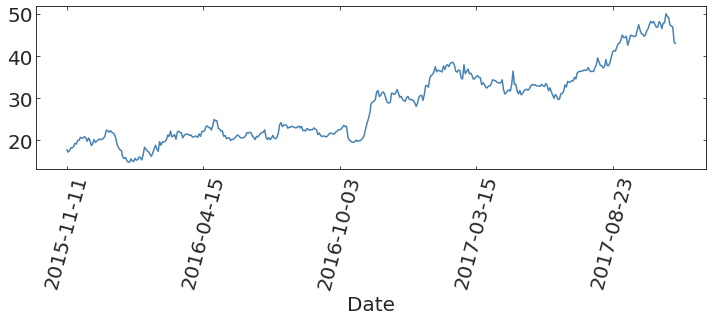

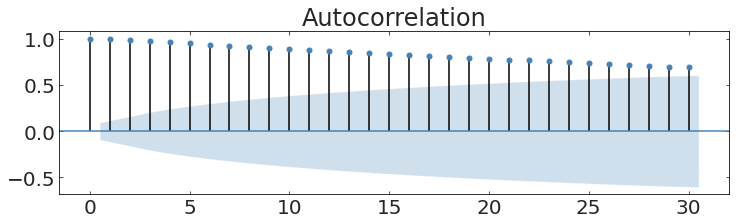

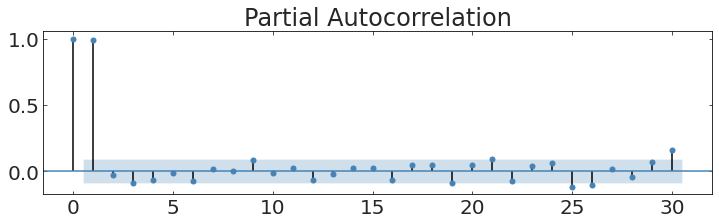

In [102]:
tss["aa.us"].plot(rot=75, figsize=(12,3));
ax = pl.figure(figsize=(12,3)).add_subplot(111)
sm.graphics.tsa.plot_acf(tss["aa.us"], lags=30, ax=ax)
ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss["aa.us"], lags=30, ax=ax);

# Stationary time series

time series aame.us is stationary


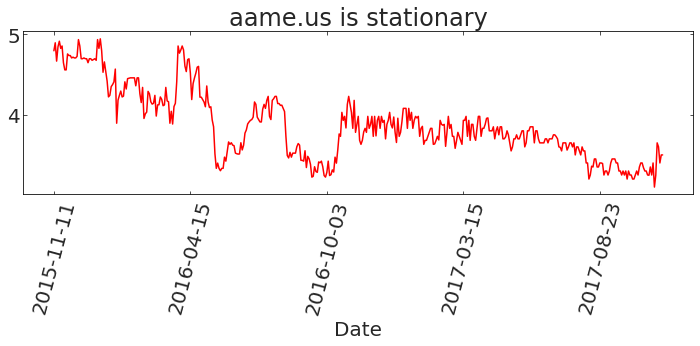

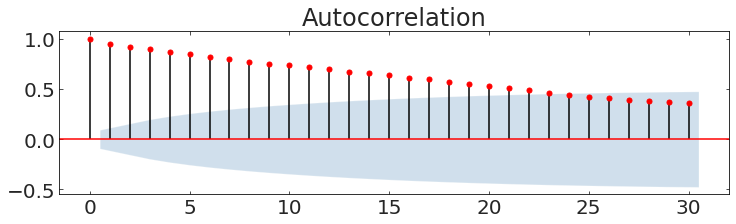

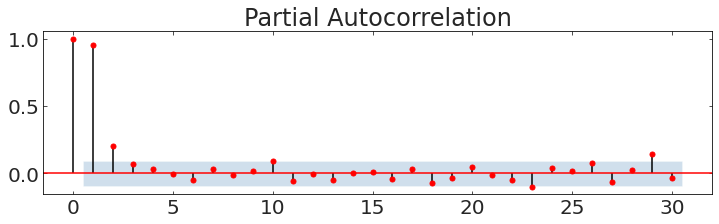

In [103]:
from matplotlib.collections import PolyCollection
column_index = -3
my_color = "red" if stationary[column_index] else "blue"
stock_name = tss.columns[column_index]



ax = tss[stock_name].plot(rot=75, figsize=(12,3), color=my_color);
ax.set_title("{} is {}".format(stock_name, "stationary" if stationary[column_index] else " not stationary"))

ax = pl.figure(figsize=(12,3)).add_subplot(111)
sm.graphics.tsa.plot_acf(tss[stock_name], lags=30, ax=ax, color=my_color)

ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss[stock_name], lags=30, ax=ax, color=my_color);

print("time series {} is {}".format(stock_name, "stationary" if stationary[column_index] else " not stationary"))

# Non stationary times series

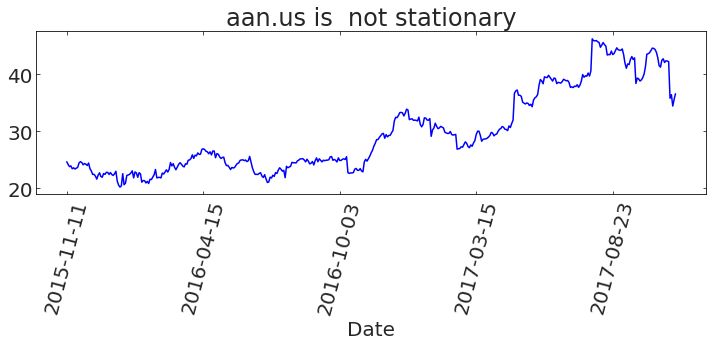

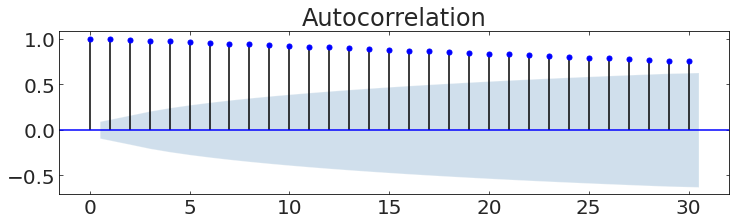

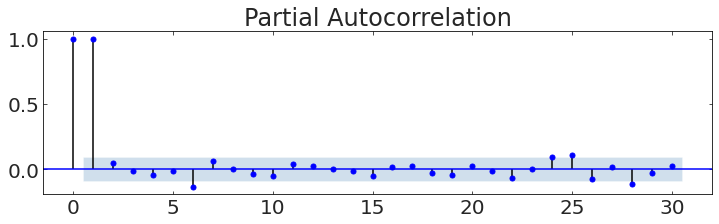

In [104]:
from matplotlib.collections import PolyCollection
column_index = -2
my_color = "red" if stationary[column_index] else "blue"
stock_name = tss.columns[column_index]



ax = tss[stock_name].plot(rot=75, figsize=(12,3), color=my_color);
ax.set_title("{} is {}".format(stock_name, "stationary" if stationary[column_index] else " not stationary"))

ax = pl.figure(figsize=(12,3)).add_subplot(111)
sm.graphics.tsa.plot_acf(tss[stock_name], lags=30, ax=ax, color=my_color)

ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss[stock_name], lags=30, ax=ax, color=my_color);


# 3. Question: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made

In [15]:
column_index = -2
my_color = "red" if stationary[column_index] else "blue"
stock_name = tss.columns[column_index]

print("I chose {} time series. I think lags of 2 is expected to be significant".format(stock_name))

I chose aan.us time series. I think lags of 2 is expected to be significant


# 4. Task: training and testing split
To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set

you do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data

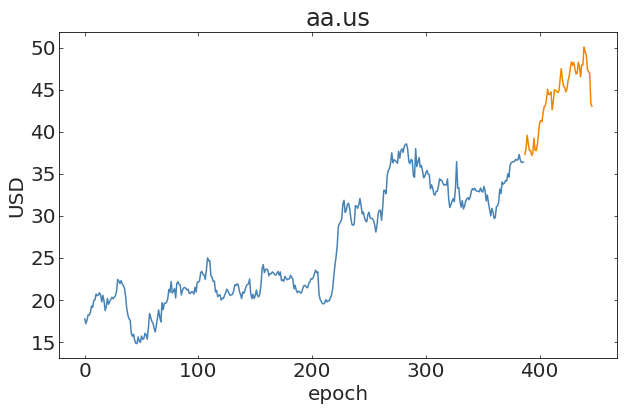

In [26]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aa.us"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aa.us"][-60:]);
pl.title("aa.us")
pl.xlabel("epoch")
pl.ylabel("USD");
N = tss.shape[0] - 60

# Part 2: Model and Forecast
Here we are doing sock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future. 


To fit the model to the data use ```statsmodels.api.tsa.ARMA```

You can inspect the function call as ```statsmodels.api.tsa.ARMA?```
The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

To look at the model result, including the AIC,  look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb



# 5. Task: Fit one of the stationary time series with ARMA
a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters. 

b. At each loop step record the AIC score for each fit. 

c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [28]:
#example of model output
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
print(mod.summary())
print(mod.aic)

                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Mon, 28 Feb 2022   AIC                           -594.115
Time:                        19:55:34   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     

In [96]:
tss.columns

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')

In [97]:
stationary

[False, False, False, False, False, False, False, True, False, False]

In [98]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
max_p, max_q = 5, 5
stationaries = [True, False]
for i, timeserie in enumerate(["aame.us", "aan.us"]):
  aics[timeserie] = np.zeros((max_p, max_q))
  print(timeserie)
  for p in range(max_p):
    for q in range(max_q):
      try:
        mod = sm.tsa.ARMA(tss[[timeserie]][:N], (p,q)).fit()
        aics[timeserie][p, q] = mod.aic
      except:
        aics[timeserie][p, q] = np.nan

  print("best parameters: ", np.where(aics[timeserie] == np.nanmin(aics[timeserie])))

aame.us
best parameters:  (array([3]), array([3]))
aan.us
best parameters:  (array([1]), array([0]))


## 6. Task: predict the in-set (training) and the future alues

you can use ```mod.plot_predict()``` to generate and visualize the prediction at once

In [99]:
# the lenght of the data
timeserie = "aame.us"
N = tss[[timeserie]].shape[0] - 60

best_p, best_q = np.where(aics[timeserie] == np.nanmin(aics[timeserie]))
mod = sm.tsa.ARMA(tss[[timeserie]][:N], (best_p.item(),best_q.item())).fit()

In [100]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  387
Model:                     ARMA(3, 3)   Log Likelihood                 253.325
Method:                       css-mle   S.D. of innovations              0.125
Date:                Mon, 28 Feb 2022   AIC                           -490.651
Time:                        20:25:29   BIC                           -458.983
Sample:                             0   HQIC                          -478.094
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9919      0.183     21.764      0.000       3.632       4.351
ar.L1.aame.us    -0.3639      0.036    -10.171      0.000      -0.434      -0.294
ar.L2.aame.us     0.3646      0.033     11.185      0.000       0.301       0.429
ar.L3.aame.us     0.9217      0.052     17.763      0.000       0.820       1.023
ma.L1.aame.us     1.0918      0.068     16.163      0.000       0.959       1.224
ma.L2.aame.us     0.6290      0.087      7.242      0.000       0.459       0.799
ma.L3.aame.us    -0.2646      0.054     -4.860      0.000      -0.371      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0242           -0.0000j            1.0242           -0.0000
AR.2           -0.7099           -0.7452j            1.0292           -0.3711
AR.3           -0.7099           +0.7452j            1.0292            0.3711
MA.1           -0.6851           -0.7342j            1.0043           -0.3695
MA.2           -0.6851           +0.7342j            1.0043            0.3695
MA.3            3.7472           -0.0000j            3.7472           -0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'aame.us prediction with  best_p,q = ([3], [3])')

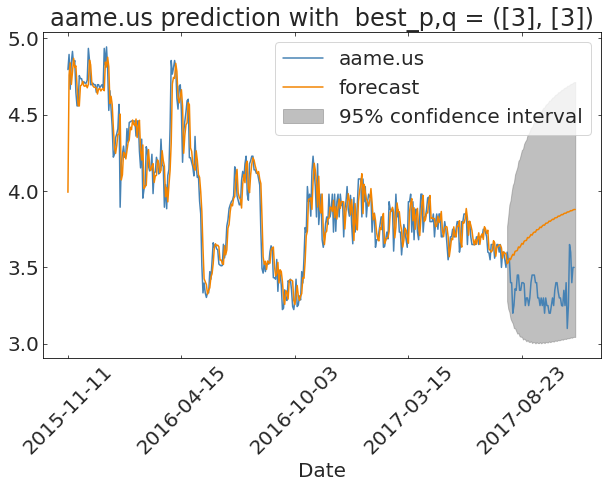

In [101]:
ax = tss[['aame.us']].plot()

mod.plot_predict(end=N+60, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_title(timeserie + " prediction with  best_p,q = ({}, {})".format(best_p, best_q))

# 7. Question: Did you make money??
...

# No I do not. The prediction is far from matching with actual stock value

# 8. Question: what are the coefficients of the best fit model? what do they mean? 


# Since the best (p, q) is (3,3).  The ar.Li and ma.Li are autoregressive and moving average of lags of i, which i = 1->3. They ares used to predict the y(t) from y(t-1), y(t-2), and y(t-3)

#  9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model

choose integration 1 to start ...

Index(['aaap.us', 'aac.us'], dtype='object')


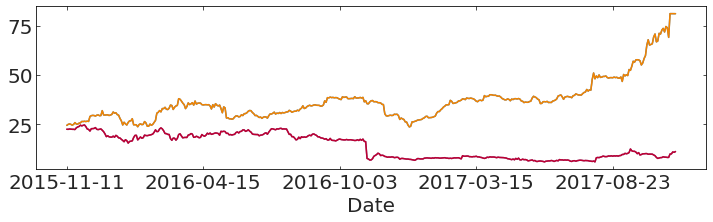

In [92]:
columns_indexes = [2, 4]
timeseries = tss.columns[columns_indexes]
print(timeseries)
ax = pl.figure(figsize=(12,3)).add_subplot(111)
for timeserie in timeseries:
  tss[timeserie].plot(ax = ax)
  tss[timeserie].plot(ax=ax)

In [93]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
max_p, max_q = 5, 5


for i, timeserie in enumerate(timeseries):
  aics[timeserie] = np.zeros((max_p, max_q))
  aics[timeserie][:] = np.nan
  print(timeserie)
  for p in range(1, max_p):
    for q in range(1, max_q):
      try:
        # if stationaries[i]:
        mod = sm.tsa.ARIMA(tss[[timeserie]][:-60], (p,1, q)).fit()
        # else:
        #   mod = sm.tsa.ARIMA(tss[[timeseries]], (p,q)).fit()
        aics[timeserie][p, q] = mod.aic
      except:
        aics[timeserie][p, q] = np.nan
  print("best parameters: ", np.where(aics[timeserie] == np.nanmin(aics[timeserie])))



aaap.us
best parameters:  (array([4]), array([2]))
aac.us
best parameters:  (array([1]), array([1]))


In [94]:
N = len(tss[[timeserie]]) - 60

aaap.us
                             ARIMA Model Results                              
Dep. Variable:              D.aaap.us   No. Observations:                  386
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -524.272
Method:                       css-mle   S.D. of innovations              0.936
Date:                Mon, 28 Feb 2022   AIC                           1064.544
Time:                        20:24:20   BIC                           1096.191
Sample:                             1   HQIC                          1077.094
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0697      0.050      1.380      0.168      -0.029       0.169
ar.L1.D.aaap.us    -0.8986      0.048    -18.652      0.000      -0.993      -0.804
ar.L2.D.aaap.us    -0.94

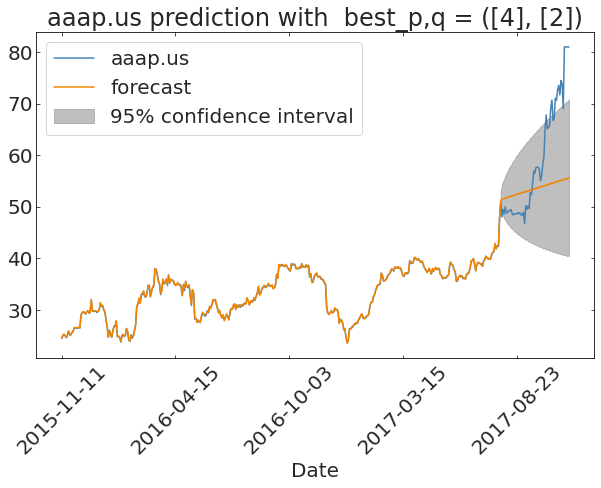

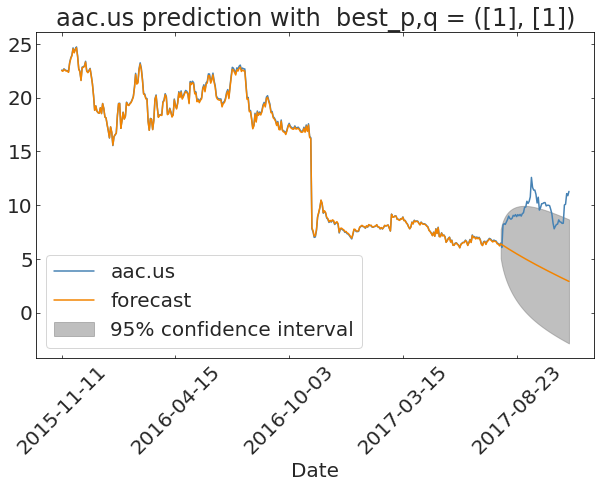

In [95]:
# the lenght of the data
for timeserie in timeseries:
  print(timeserie)
  best_p, best_q = np.where(aics[timeserie] == np.nanmin(aics[timeserie]))
  mod = sm.tsa.ARIMA(tss[[timeserie]][:N], (best_p.item(),1, best_q.item())).fit()
  print(mod.summary())
  ax = tss[[timeserie]].plot()

  mod.plot_predict(end=N+60, plot_insample=False, ax=ax);
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
  ax.set_title(timeserie + " prediction with  best_p,q = ({}, {})".format(best_p, best_q))

#10. Question: Did you get rich?

# No I do not

# 11 Task: Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [77]:
timeserie = timeseries[0]
timeserie

'aaap.us'

In [78]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
max_p, max_q = 5, 5
max_d = 5


for d in range(1, max_d):
  print(timeserie+"_"+str(d))

  aics[timeserie+"_"+str(d)] = np.zeros((max_p, max_q))
  aics[timeserie+"_"+str(d)][:] = np.nan
  for p in range(1, max_p):
    for q in range(1, max_q):
      try:
        # if stationaries[i]:
        mod = sm.tsa.ARIMA(tss[[timeserie]][:N], (p,d, q)).fit()
        # else:
        #   mod = sm.tsa.ARIMA(tss[[timeseries]], (p,q)).fit()
        aics[timeserie+"_"+str(d)][p, q] = mod.aic
      except:
        aics[timeserie+"_"+str(d)][p, q] = np.nan
  print("best parameters: ", np.where(aics[timeserie+"_"+str(d)] == np.nanmin(aics[timeserie+"_"+str(d)])))



aaap.us_1
best parameters:  (array([4]), array([2]))
aaap.us_2
best parameters:  (array([1]), array([1]))
aaap.us_3
best parameters:  (array([], dtype=int64), array([], dtype=int64))
aaap.us_4
best parameters:  (array([], dtype=int64), array([], dtype=int64))


# Use d  = 1, 2 for example

aaap.us_1
                             ARIMA Model Results                              
Dep. Variable:              D.aaap.us   No. Observations:                  386
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -524.272
Method:                       css-mle   S.D. of innovations              0.936
Date:                Mon, 28 Feb 2022   AIC                           1064.544
Time:                        20:22:17   BIC                           1096.191
Sample:                             1   HQIC                          1077.094
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0697      0.050      1.380      0.168      -0.029       0.169
ar.L1.D.aaap.us    -0.8986      0.048    -18.652      0.000      -0.993      -0.804
ar.L2.D.aaap.us    -0.

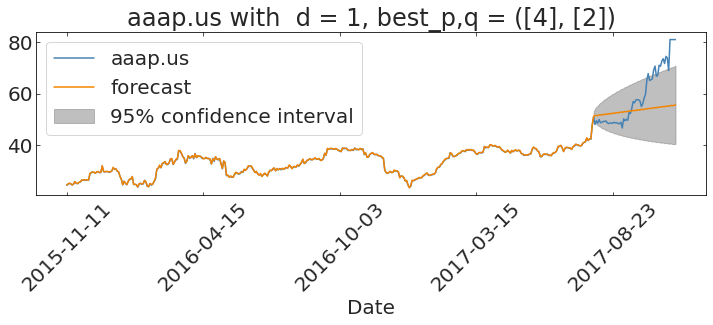

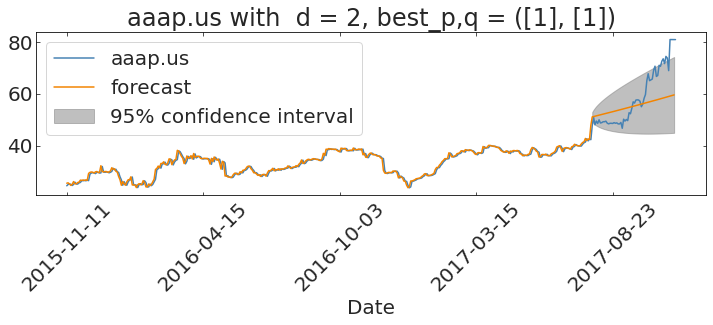

In [91]:
timeserie = timeseries[0]
# the lenght of the data
for d in range(1,3):
  timeserie_temp= timeserie + "_"+str(d)
  print(timeserie_temp)
  best_p, best_q = np.where(aics[timeserie_temp] == np.nanmin(aics[timeserie_temp]))
  mod = sm.tsa.ARIMA(tss[[timeserie]][:N], (best_p.item(),d, best_q.item())).fit()
  print(mod.summary())
  ax =pl.figure(figsize=(12,3)).add_subplot(111)
  tss[[timeserie]].plot(ax = ax)

  mod.plot_predict(end=N+60, plot_insample=False, ax=ax);
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
  ax.set_title(timeserie + " with  d = {}, best_p,q = ({}, {})".format(d, best_p, best_q))

# The ar.Li and ma.Li are autoregressive and moving average of lags of i. Autoregressive coefficient is used to calculate y(t) while, moving average coefficient is used to calculata mu(t)